# Modifying DataFrames - Exercises

# Preparations

In [1]:
import pandas as pd

pd.set_option("display.max_columns", 500)

# Exercise 1

1. Load the file 'financial_data_intro.csv' into a `pd.DataFrame`.
2. Replace *u_iso3* with "UK" for all rows that have *u_iso3* == "GBR".
3. Convert *cb_naics* to data type `str`.
4. Create a new column *industry_label* that takes the value "special" if *cb_naics* starts with "6", and "normal" otherwise.
5. Replace *cb_ni* with `pd.NA` if *u_year* == 2005.
6. Calculate a new column taking the value 1 if *cb_ni* is negative and 0 if *cb_ni* is >= 0.
7. Bonus: Create a new column *industry_label_2* that takes the value True if *cb_naics* starts with "6", and False otherwise.
8. Bonus: delete all numeric columns in-place.
9. Bonus: convert the column *u_fye* to a `datetime` data type

## 1. Load the file 'financial_data_intro.csv' into a `pd.DataFrame`.

In [2]:
# load the following tab-separated text file
df = pd.read_csv("../../data/raw/financial_data_intro.csv")
df.head()

,u_company_name_id,u_year,u_company_name,cb_naics,u_iso3,u_fye,cb_cusip,cb_at,cb_ni,cb_financial_industry
0,14651,2005,British American Tobacco PLC,312230,GBR,2005-12-31,110448107,32737.984,2707.110,False
1,14651,2006,British American Tobacco PLC,312230,GBR,2006-12-31,110448107,34816.074,3713.506,False
2,14651,2007,British American Tobacco PLC,312230,GBR,2007-12-31,110448107,37161.970,4226.559,False
3,14651,2008,British American Tobacco PLC,312230,GBR,2008-12-31,110448107,40276.807,3591.888,False
4,14651,2009,British American Tobacco PLC,312230,GBR,2009-12-31,110448107,43026.854,4386.107,False


## 2. Replace *u_iso3* with "UK" for all rows that have *u_iso3* == "GBR".

In [3]:
df.loc[df["u_iso3"] == "GBR", "u_iso3"] = "UK"
df.head(4)

,u_company_name_id,u_year,u_company_name,cb_naics,u_iso3,u_fye,cb_cusip,cb_at,cb_ni,cb_financial_industry
0,14651,2005,British American Tobacco PLC,312230,UK,2005-12-31,110448107,32737.984,2707.110,False
1,14651,2006,British American Tobacco PLC,312230,UK,2006-12-31,110448107,34816.074,3713.506,False
2,14651,2007,British American Tobacco PLC,312230,UK,2007-12-31,110448107,37161.970,4226.559,False
3,14651,2008,British American Tobacco PLC,312230,UK,2008-12-31,110448107,40276.807,3591.888,False


## 3. Convert *cb_naics* to data type `str`.

In [4]:
df["cb_naics"] = df["cb_naics"].astype("str")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   u_company_name_id      824 non-null    int64  
 1   u_year                 824 non-null    int64  
 2   u_company_name         824 non-null    object 
 3   cb_naics               824 non-null    object 
 4   u_iso3                 824 non-null    object 
 5   u_fye                  824 non-null    object 
 6   cb_cusip               824 non-null    object 
 7   cb_at                  824 non-null    float64
 8   cb_ni                  824 non-null    float64
 9   cb_financial_industry  824 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 58.9+ KB


## 4. Create a new column *industry_label* that takes the value "special" if *cb_naics* starts with "6", and "normal" otherwise.

In [5]:
df["industry_label"] = "normal"
df.loc[df["cb_naics"].str.startswith("6"), "industry_label"] = "special"
pd.crosstab(df["cb_naics"], df["industry_label"]).tail(8)

industry_label,normal,special
cb_naics,,
533110,26,0
541360,15,0
541810,14,0
611420,0,14
621492,0,14
621999,0,15
722310,15,0
999977,14,0


## 5. Replace *cb_ni* with `pd.NA` if *u_year* == 2005.

In [6]:
df.loc[df["u_year"] == 2005, "cb_ni"] = pd.NA
df.head(3)

,u_company_name_id,u_year,u_company_name,cb_naics,u_iso3,u_fye,cb_cusip,cb_at,cb_ni,cb_financial_industry,industry_label
0,14651,2005,British American Tobacco PLC,312230,UK,2005-12-31,110448107,32737.984,NaN,False,normal
1,14651,2006,British American Tobacco PLC,312230,UK,2006-12-31,110448107,34816.074,3713.506,False,normal
2,14651,2007,British American Tobacco PLC,312230,UK,2007-12-31,110448107,37161.970,4226.559,False,normal


## 6. Calculate a new column taking the value 1 if *cb_ni* is negative and 0 if *cb_ni* is >= 0.

In [7]:
df["cb_ni_negative"] = (df["cb_ni"] < 0) * 1
df.head(3)

,u_company_name_id,u_year,u_company_name,cb_naics,u_iso3,u_fye,cb_cusip,cb_at,cb_ni,cb_financial_industry,industry_label,cb_ni_negative
0,14651,2005,British American Tobacco PLC,312230,UK,2005-12-31,110448107,32737.984,NaN,False,normal,0
1,14651,2006,British American Tobacco PLC,312230,UK,2006-12-31,110448107,34816.074,3713.506,False,normal,0
2,14651,2007,British American Tobacco PLC,312230,UK,2007-12-31,110448107,37161.970,4226.559,False,normal,0


In [8]:
# Ensure that NA in cb_ni is also NA in this new column:
df.loc[df["cb_ni"].isna(), "cb_ni_negative"] = pd.NA
df.head(3)

,u_company_name_id,u_year,u_company_name,cb_naics,u_iso3,u_fye,cb_cusip,cb_at,cb_ni,cb_financial_industry,industry_label,cb_ni_negative
0,14651,2005,British American Tobacco PLC,312230,UK,2005-12-31,110448107,32737.984,NaN,False,normal,NaN
1,14651,2006,British American Tobacco PLC,312230,UK,2006-12-31,110448107,34816.074,3713.506,False,normal,0.0
2,14651,2007,British American Tobacco PLC,312230,UK,2007-12-31,110448107,37161.970,4226.559,False,normal,0.0


## 7. Bonus: Create a new column *industry_label_2* that takes the value True if *cb_naics* starts with "6", and False otherwise.

In [9]:
df["industry_label2"] = df["cb_naics"].str.startswith("6")
df.head(3)

,u_company_name_id,u_year,u_company_name,cb_naics,u_iso3,u_fye,cb_cusip,cb_at,cb_ni,cb_financial_industry,industry_label,cb_ni_negative,industry_label2
0,14651,2005,British American Tobacco PLC,312230,UK,2005-12-31,110448107,32737.984,NaN,False,normal,NaN,False
1,14651,2006,British American Tobacco PLC,312230,UK,2006-12-31,110448107,34816.074,3713.506,False,normal,0.0,False
2,14651,2007,British American Tobacco PLC,312230,UK,2007-12-31,110448107,37161.970,4226.559,False,normal,0.0,False


## 8. Bonus: delete all numeric columns

In [10]:
df = df.drop(columns=df.select_dtypes(["int", "float"]).columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   u_company_name         824 non-null    object
 1   cb_naics               824 non-null    object
 2   u_iso3                 824 non-null    object
 3   u_fye                  824 non-null    object
 4   cb_cusip               824 non-null    object
 5   cb_financial_industry  824 non-null    bool  
 6   industry_label         824 non-null    object
 7   industry_label2        824 non-null    bool  
dtypes: bool(2), object(6)
memory usage: 40.4+ KB


## 9. Bonus: convert the column *u_fye* to a `datetime` data type

In [11]:
df["u_fye"] = pd.to_datetime(df["u_fye"])
df.head(3)

,u_company_name,cb_naics,u_iso3,u_fye,cb_cusip,cb_financial_industry,industry_label,industry_label2
0,British American Tobacco PLC,312230,UK,2005-12-31,110448107,False,normal,False
1,British American Tobacco PLC,312230,UK,2006-12-31,110448107,False,normal,False
2,British American Tobacco PLC,312230,UK,2007-12-31,110448107,False,normal,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   u_company_name         824 non-null    object        
 1   cb_naics               824 non-null    object        
 2   u_iso3                 824 non-null    object        
 3   u_fye                  824 non-null    datetime64[ns]
 4   cb_cusip               824 non-null    object        
 5   cb_financial_industry  824 non-null    bool          
 6   industry_label         824 non-null    object        
 7   industry_label2        824 non-null    bool          
dtypes: bool(2), datetime64[ns](1), object(5)
memory usage: 40.4+ KB


# Exercise 2

1. Load the file 'bank-additional-full.csv' into a `pd.DataFrame`.
2. Rename the column 'y' to 'target'.
3. Drop the column 'duration'.
4. Give all other columns the prefix 'feature_'.
5. Replace the value 999 in column 'pdays' with `pd.NA`.

## 1. Load the file 'bank-additional-full.csv' into a `pd.DataFrame`.

In [13]:
df = pd.read_csv("../../data/raw/bank-additional-full.csv", delimiter=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## 2. Rename the column 'y' to 'target'.

In [14]:
df = df.rename(columns={"y": "target"})
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')

## 3. Drop the column 'duration'.

In [15]:
df = df.drop(columns=["duration"])
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'target'],
      dtype='object')

## 4. Give columns, other than 'y', the prefix 'feature_'.

In [16]:
df = df.add_prefix("feature_").rename(columns={"feature_target": "target"})
df.columns

Index(['feature_age', 'feature_job', 'feature_marital', 'feature_education',
       'feature_default', 'feature_housing', 'feature_loan', 'feature_contact',
       'feature_month', 'feature_day_of_week', 'feature_campaign',
       'feature_pdays', 'feature_previous', 'feature_poutcome',
       'feature_emp.var.rate', 'feature_cons.price.idx',
       'feature_cons.conf.idx', 'feature_euribor3m', 'feature_nr.employed',
       'target'],
      dtype='object')

## 5. Replace the value 999 in column 'feature_pdays' with `pd.NA`.

In [17]:
# display the values in feature_pdays first:
df["feature_pdays"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

<Axes: ylabel='Frequency'>

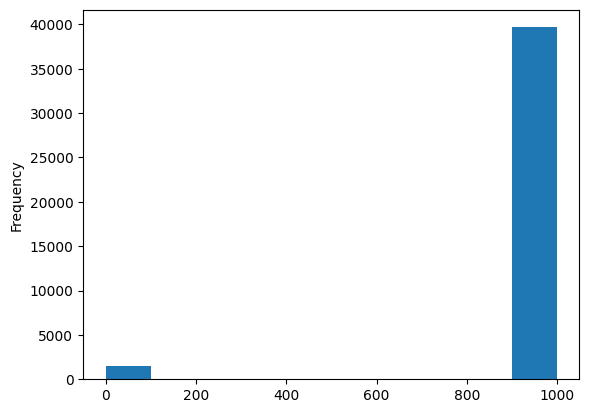

In [18]:
# we can also plot a histogram
df["feature_pdays"].plot(kind="hist")

In [19]:
df["feature_pdays"] = df["feature_pdays"].replace(999, pd.NA)
df["feature_pdays"].unique()

array([<NA>, 6, 4, 3, 5, 1, 0, 10, 7, 8, 9, 11, 2, 12, 13, 14, 15, 16, 21,
       17, 18, 22, 25, 26, 19, 27, 20], dtype=object)

<Axes: ylabel='Frequency'>

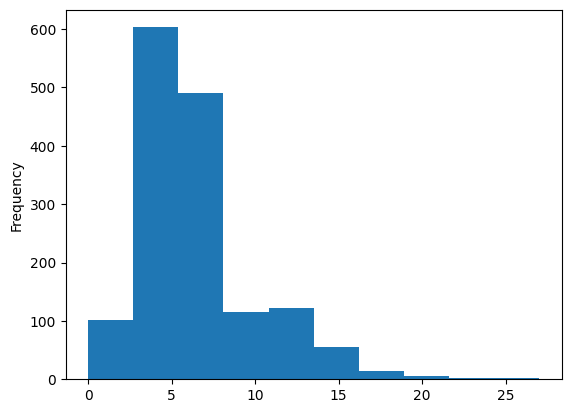

In [20]:
df["feature_pdays"].dropna().plot(kind="hist")